In [1]:
import os
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

## 1. Download data using obspy

In [2]:
client = Client("SCEDC")
data_dir = "mseed"
if not os.path.exists(data_dir):
  os.makedirs(data_dir)

In [3]:
starttime = UTCDateTime("2019-07-04T17:00:00")
endtime = UTCDateTime("2019-07-05T00:00:00")

In [4]:
CCC = client.get_waveforms("CI", "CCC", "*", "HHE,HHN,HHZ", starttime, endtime)
CLC = client.get_waveforms("CI", "CLC", "*", "HHE,HHN,HHZ", starttime, endtime)

In [5]:
CCC.write(os.path.join(data_dir, "CCC.mseed"))
CLC.write(os.path.join(data_dir, "CLC.mseed"))

## 2. Prepare filename list

In [6]:
with open("fname.csv", 'w') as fp:
  fp.write("fname,E,N,Z\n")
  fp.write("CCC.mseed,HHE,HHN,HHZ\n")
  fp.write("CLC.mseed,HHE,HHN,HHZ\n")

In [7]:
# !cat fname.csv

## 3. Run PhaseNet

```bash
python run.py --mode=pred --model_dir=model/190703-214543 --data_dir=demo/mseed --data_list=demo/fname.csv --output_dir=output --batch_size=20 --input_mseed
```


Check figures of waveform and predictions:
```bash
python run.py --mode=pred --model_dir=model/190703-214543 --data_dir=demo/mseed --data_list=demo/fname.csv --output_dir=output --plot_figure --batch_size=20 --input_mseed
```

In [8]:
st1 = obspy.read("mseed/CLC.mseed")

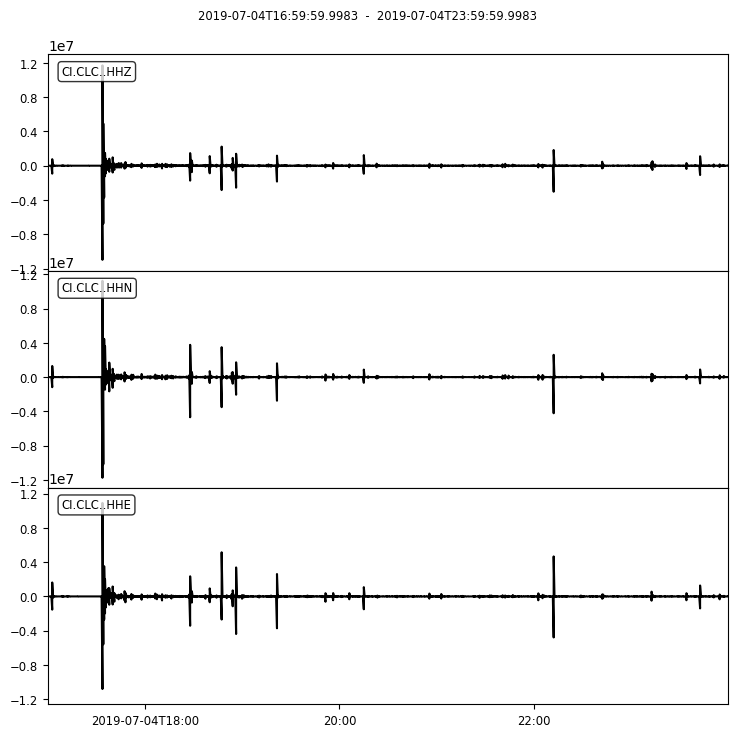

In [9]:
st1.plot();